In [1]:
# Import libaraies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import label_binarize

In [12]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/zihanyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zihanyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 1: Preprocess Data

### 1.1 Drop unrelated columns and NA/None values

In [2]:
def clean_data(folder='data',files = ['Automotive_5.json','CDs_and_Vinyl_5.json','Cell_Phones_and_Accessories_5.json','Grocery_and_Gourmet_Food_5.json','Toys_and_Games_5.json']):
    
    review_files = {}
    
    for file_name in files:
        name = file_name.split('_')[0]
        row  = pd.read_json(folder+'/'+file_name,lines=True)
        # Delete all columns except 'Ooverall', 'reviewText', 'summary'
        row = row.drop(columns=['verified','reviewTime','reviewerID','asin','reviewerName','unixReviewTime','vote','image','style'])
        print(f"For category {name}")
        print(row.isnull().sum())
        print(f"Dataset before dropping: {len(row)}")
        # Delet all null rows
        row = row.dropna()
        print(f"Dataset after dropping: {len(row)}")
        row['reviewText'] = row['reviewText']
        review_files[name] = row
    
    return review_files

In [3]:
df_collect = clean_data()

For category Automotive
overall         0
reviewText    866
summary       342
dtype: int64
Dataset before dropping: 1711519
Dataset after dropping: 1710350
For category CDs
reviewText    280
overall         0
summary       227
dtype: int64
Dataset before dropping: 1443755
Dataset after dropping: 1443288
For category Cell
overall         0
reviewText    765
summary       517
dtype: int64
Dataset before dropping: 1128437
Dataset after dropping: 1127206
For category Grocery
overall         0
reviewText    390
summary       219
dtype: int64
Dataset before dropping: 1143860
Dataset after dropping: 1143292
For category Toys
overall          0
reviewText    1175
summary        372
dtype: int64
Dataset before dropping: 1828971
Dataset after dropping: 1827456


In [ ]:
""""
def read_file(filepath):
    seg_docs = {}
    
    with open(filepath, 'r') as file:
        file_dict = json.load(file)
    
    seg_docs = {}
    
    for key, text in file_dict.items():
        
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        words = word_tokenize(text)
        words_list = []
        for word in words:
            if word not in stop_words:
                words_list.append(word)
        
        seg_docs[key] = words_list
    
    return seg_docs
    """

In [ ]:
"""
def strip_clean(reviews_dict):
    
    def process_entry(sentence):
        sentence = sentence.lower()
        sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)
        words_list = []
        for word in sentence:
            if word not in stop_words():
                words_list.append(word)
        return words_list
    
    stripped_dict = {}
    
    for key,df in reviews_dict.items():
        df['reviewText'] = df['reviewText'].apply(process_entry)
        df['summary'] = df['summary'].apply(process_entry)
        stripped_dict[key] = df
    
    return stripped_dict
    """

In [4]:
print(df_collect.keys())

dict_keys(['Automotive', 'CDs', 'Cell', 'Grocery', 'Toys'])


### 1.2 Drop duplicates

In [5]:
def drop_duplicate(tables):
    # Initialize a dictionary to store data
    clean_tables = {}
    for name, table in tables.items():
        print(f"For category {name}")
        
        # Convert the table into dataframe
        df = pd.DataFrame(table)
        duplicates = df.duplicated()
        print(f"Number of duplicate: {duplicates.sum()}")

        print(f"Before dropping: {len(df)}")
        df_drop_dup = df.drop_duplicates()
        print(f"After dropping: {len(df_drop_dup)}")

        # Store the cleaned data into dictionary
        clean_tables[name] = df_drop_dup
    return clean_tables

In [6]:
# Drop duplicates
df_drop_dup = drop_duplicate(df_collect)

For category Automotive
Number of duplicate: 322354
Before dropping: 1710350
After dropping: 1387996
For category CDs
Number of duplicate: 191204
Before dropping: 1443288
After dropping: 1252084
For category Cell
Number of duplicate: 171530
Before dropping: 1127206
After dropping: 955676
For category Grocery
Number of duplicate: 230906
Before dropping: 1143292
After dropping: 912386
For category Toys
Number of duplicate: 326697
Before dropping: 1827456
After dropping: 1500759


In [7]:
def pie_chart_statistic(tables):
    for name, table in tables.items():
        # Convert to series and count the 'overall ratings'
        counts = pd.Series(table['overall']).value_counts()
        print(f"Number of ratings of {name}: {counts}")

        # Define the parameters of the pie charts
        plt.figure(figsize = (6,6))
        plt.pie(
            counts,
            labels = counts.index,
            autopct = '%1.1f%%',
            startangle = 90,
            wedgeprops = {'edgecolor': 'black'}
        )

        plt.title(f"Distribution of Overall Ratings in {name}")
        plt.show()

Number of ratings of Automotive: overall
5    971580
4    202218
3     91867
1     74017
2     48314
Name: count, dtype: int64


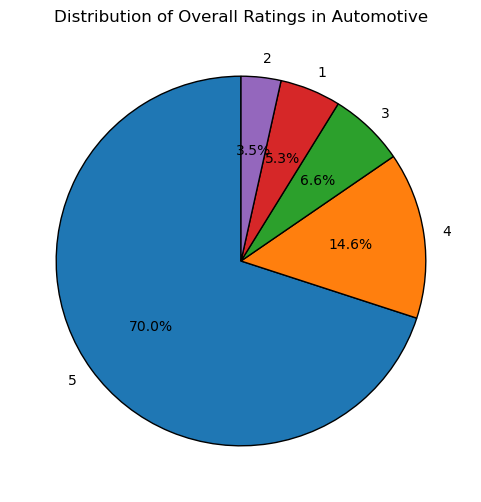

Number of ratings of CDs: overall
5    813811
4    250756
3    102760
2     43769
1     40988
Name: count, dtype: int64


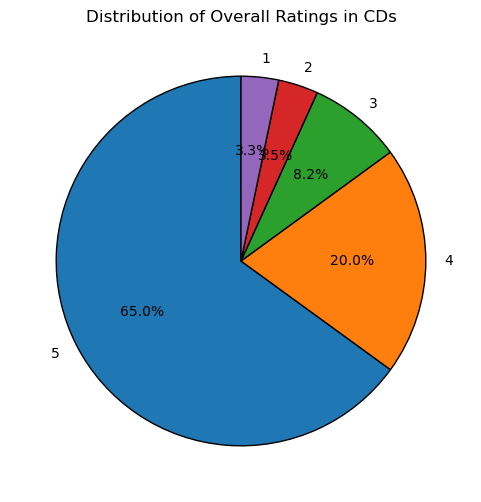

Number of ratings of Cell: overall
5    569477
4    163280
3     90656
1     77448
2     54815
Name: count, dtype: int64


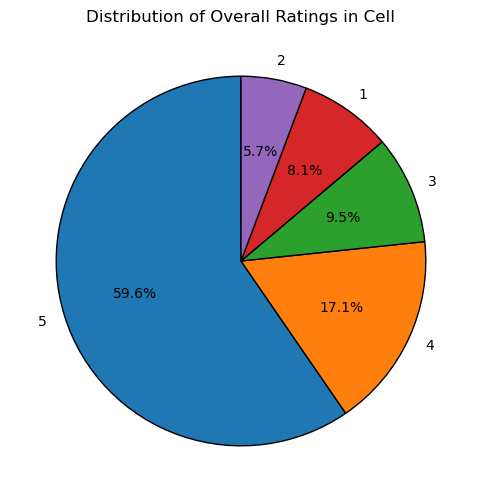

Number of ratings of Grocery: overall
5    637248
4    124386
3     69986
1     43417
2     37349
Name: count, dtype: int64


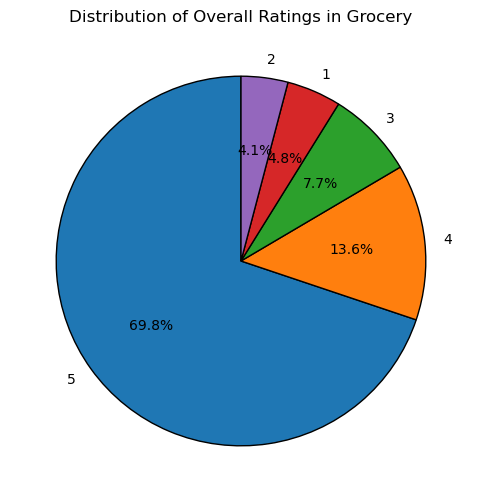

Number of ratings of Toys: overall
5    1025714
4     241122
3     120025
1      59163
2      54735
Name: count, dtype: int64


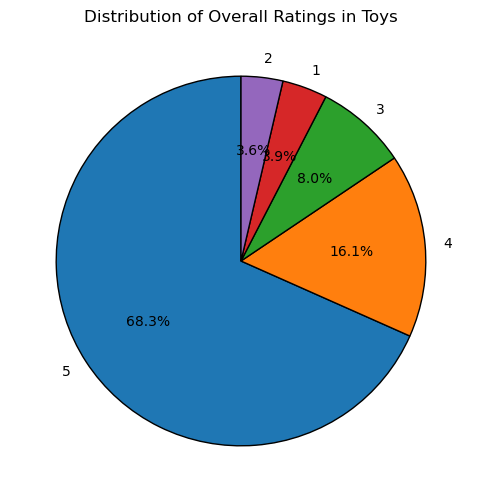

In [8]:
# Draw the pie charts
pie_chart_statistic(df_drop_dup)

Number of ratings of: overall
5    4017830
4     981762
3     475294
1     295033
2     238982
Name: count, dtype: int64


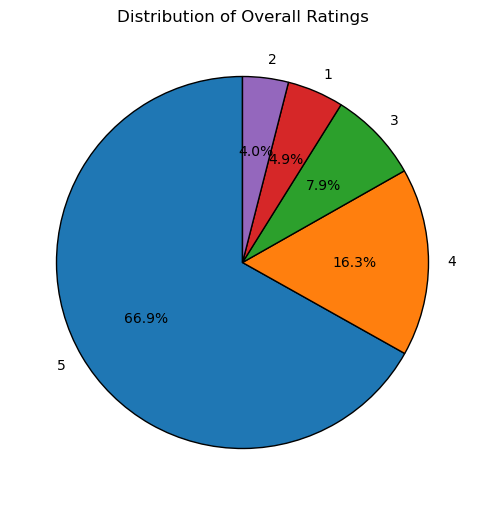

In [14]:
# Remember to run the following code first 
counts = df_drop_dup1['overall'].value_counts()
print(f"Number of ratings of: {counts}")

        # Define the parameters of the pie charts
plt.figure(figsize = (6,8))
plt.pie(
    counts,
    labels = counts.index,
    autopct = '%1.1f%%',
    startangle = 90,
    wedgeprops = {'edgecolor': 'black'}
)

plt.title(f"Distribution of Overall Ratings")
plt.show()

The dataset is highly inbalanced.

### 1.3 Tokenization

In [9]:
def create_category_dataframes(tables):
    for category, data in tables.items():
       globals()[f"df_{category}"] = pd.DataFrame(data)

# Seperate each category to a table
create_category_dataframes(df_drop_dup)

In [11]:
# Concat the 5 tables to a large dataframe
dataframes = [df_Automotive, df_CDs, df_Cell, df_Grocery, df_Toys]
df_drop_dup1 = pd.concat(dataframes, axis = 0)

df_drop_dup1 = df_drop_dup1.reset_index(drop=True)
df_drop_dup1.head()

,overall,reviewText,summary
0,4,"After I wrote the below review, the manufactur...",Works well if you place phone in horizontally ...
1,1,It sucks barely picks up anything definitely n...,sucks
2,1,"Well to write a short one, it blew 2 fuses of ...",Defective
3,3,I have absolutely no memory of buying this but...,Looks cool! Probably works
4,5,it ok it does it job,Five Stars


In [12]:
# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def tokenize_text(text):
    # Lowercase 
    text = text.lower()
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Filter out stopwords and non-alphanumeric tokens
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    return tokens

In [ ]:
# Copy a new data frame to store the tokenized data
df_token = df_drop_dup1.copy()
# Tokenize 'reviewText' and 'summary'
df_token['reviewText'] = df_token['reviewText'].apply(tokenize_text)
df_token['summary'] = df_token['summary'].apply(tokenize_text)
df_token.head()

In [ ]:
def tokenization_statistics(column,column_name):
     # Vocabulary size
     vocabulary = set(token for tokens in column for token in tokens)
     vocabulary_size = len(vocabulary)

     print(f"Statistics of '{column_name}':")
     print(f"Vocabulary size: {vocabulary_size}")

In [25]:
# Do some statistics
print(f"Number of total reviews: {len(df_token)}")
# The vocabulary size of 'reviewText' and 'summary'
tokenization_statistics(df_token['reviewText'], 'reviewText')
tokenization_statistics(df_token['summary'], 'summary')

Number of total reviews: 6008901
Statistics of 'reviewText':
Vocabulary size: 598826
Statistics of 'summary':
Vocabulary size: 134096


In [15]:
df_drop_dup1['review_word_count'] = df_drop_dup1['reviewText'].apply(lambda x: len(x.split()))
df_drop_dup1['summary_word_count'] = df_drop_dup1['summary'].apply(lambda x: len(x.split()))
df_drop_dup1[['review_word_count', 'summary_word_count']].describe()


,review_word_count,summary_word_count
count,6.008901e+06,6.008901e+06
mean,6.531003e+01,4.648720e+00
std,1.114058e+02,3.688551e+00
min,0.000000e+00,0.000000e+00
25%,1.200000e+01,2.000000e+00
50%,2.900000e+01,3.000000e+00
75%,7.000000e+01,6.000000e+00
max,5.905000e+03,9.100000e+01


In [19]:
# Calculate word counts for reviewText and summary
df_drop_dup1['review_word_count'] = df_drop_dup1['reviewText'].apply(lambda x: len(x.split()))
df_drop_dup1['summary_word_count'] = df_drop_dup1['summary'].apply(lambda x: len(x.split()))

# Generate descriptive statistics for the word count columns
stats = df_drop_dup1[['review_word_count', 'summary_word_count']].describe()

# Format the statistics for better readability
formatted_stats = stats.applymap(lambda x: f"{x:,.3f}")

# Print the formatted statistics
formatted_stats


/var/folders/c1/tfd36pmd4wdclwf5mlyncpcc0000gn/T/ipykernel_16965/874625634.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_stats = stats.applymap(lambda x: f"{x:,.3f}")


,review_word_count,summary_word_count
count,"6,008,901.000","6,008,901.000"
mean,65.310,4.649
std,111.406,3.689
min,0.000,0.000
25%,12.000,2.000
50%,29.000,3.000
75%,70.000,6.000
max,"5,905.000",91.000


In [33]:
Q1 = df_drop_dup1['review_word_count'].quantile(0.25)
Q3 = df_drop_dup1['review_word_count'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR
print(threshold)


157.0


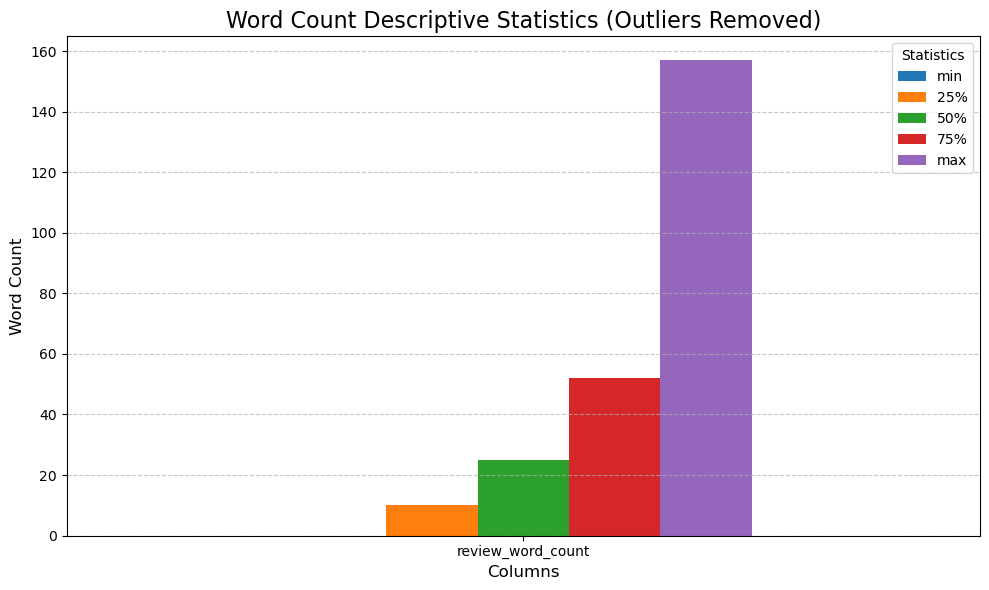

In [35]:
# Set a threshold for maximum word count
threshold = 157  # Example threshold, you can adjust this based on your data

# Filter the data to exclude outliers
filtered_data = df_drop_dup1[
    (df_drop_dup1['review_word_count'] <= threshold)
]

# Recompute descriptive statistics
filtered_stats = filtered_data[['review_word_count']].describe()

# Prepare data for the graph
filtered_stats_transposed = filtered_stats.T
filtered_stats_transposed = filtered_stats_transposed[['min', '25%', '50%', '75%', 'max']]

# Plot the filtered data
fig, ax = plt.subplots(figsize=(10, 6))
filtered_stats_transposed.plot(kind='bar', ax=ax)

# Customize the chart
ax.set_title('Word Count Descriptive Statistics (Outliers Removed)', fontsize=16)
ax.set_ylabel('Word Count', fontsize=12)
ax.set_xlabel('Columns', fontsize=12)
ax.legend(title="Statistics", fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


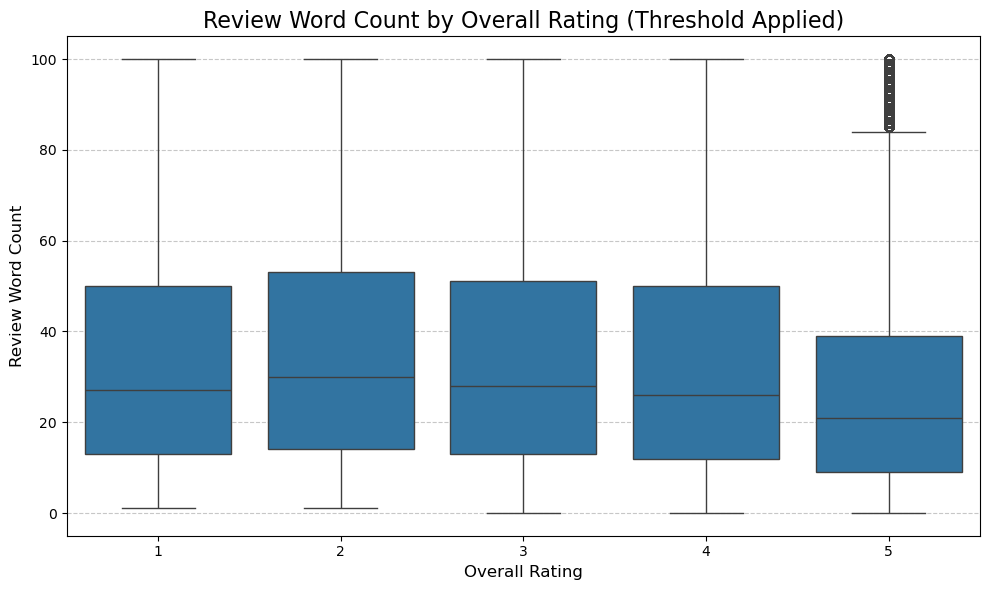

In [31]:
import seaborn as sns

# Set a threshold for review_word_count
threshold = 100  # Example threshold
filtered_df = df_drop_dup1[df_drop_dup1['review_word_count'] <= threshold]

# Create the box plot with the filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(x='overall', y='review_word_count', data=filtered_df)

# Customize the plot
plt.title('Review Word Count by Overall Rating (Threshold Applied)', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Review Word Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


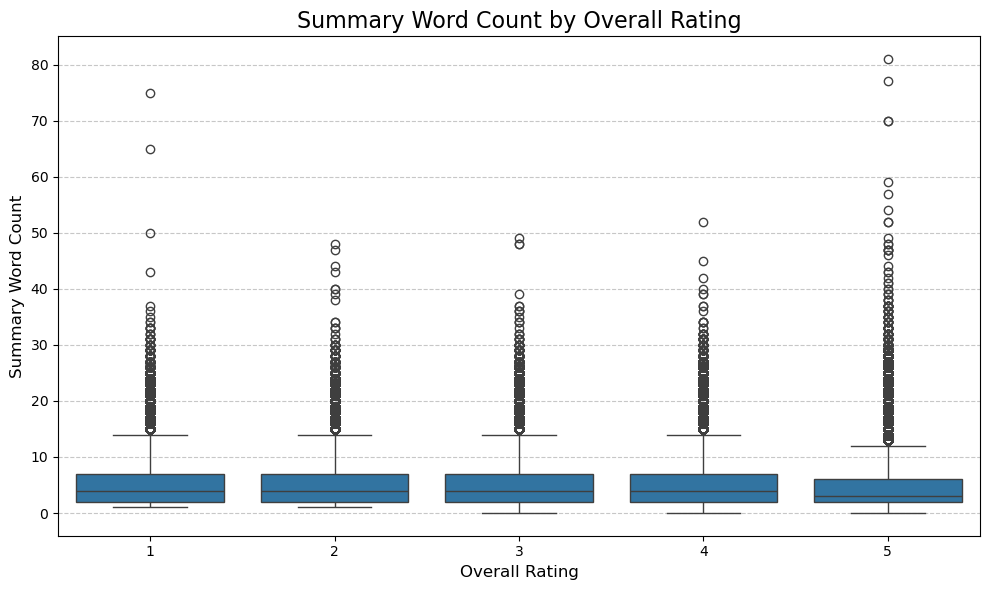

In [32]:
# Set a threshold for review_word_count
threshold = 90 # Example threshold
filtered_df = df_drop_dup1[df_drop_dup1['summary_word_count'] <= threshold]

# Create the box plot with the filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(x='overall', y='summary_word_count', data=filtered_df)

# Customize the plot
plt.title('Summary Word Count by Overall Rating', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Summary Word Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/c1/tfd36pmd4wdclwf5mlyncpcc0000gn/T/ipykernel_16965/3068413251.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['word_count_bin'] = pd.cut(filtered_df['review_word_count'], bins=50)
/var/folders/c1/tfd36pmd4wdclwf5mlyncpcc0000gn/T/ipykernel_16965/3068413251.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = filtered_df.groupby('word_count_bin')['overall'].mean()


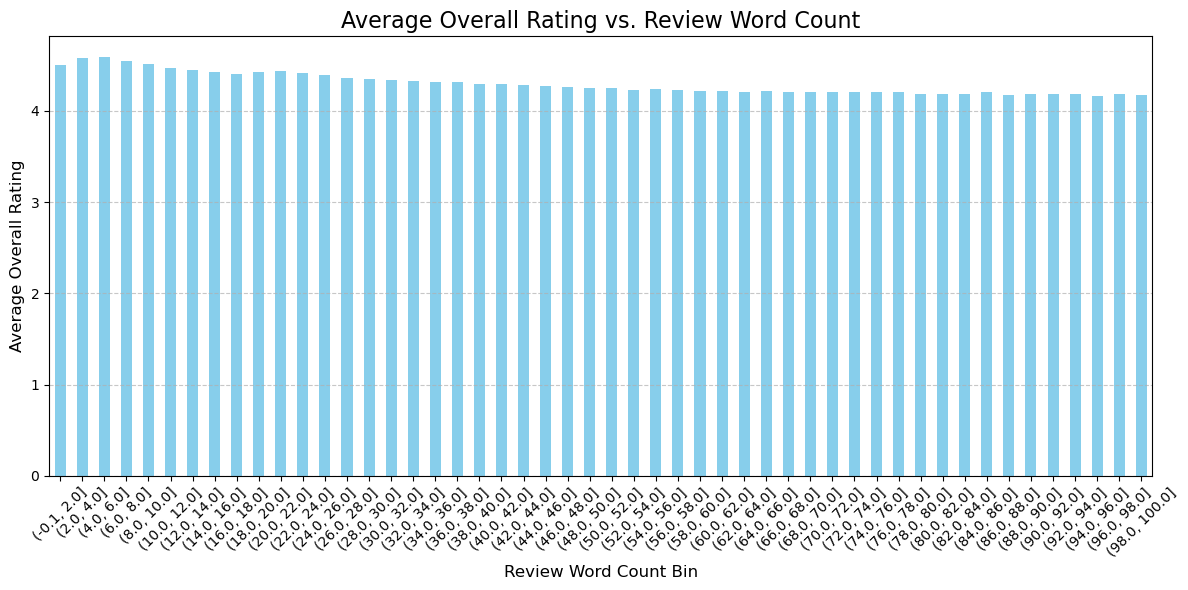

In [48]:
# Create a column for text length (e.g., review_word_count)
df_drop_dup1['review_word_count'] = df_drop_dup1['reviewText'].apply(lambda x: len(x.split()))

# Set a threshold for the length of the text
threshold = 100  # Example threshold
filtered_df = df_drop_dup1[df_drop_dup1['review_word_count'] <= threshold]

# Bin the review word counts
filtered_df['word_count_bin'] = pd.cut(filtered_df['review_word_count'], bins=50)

# Calculate the average overall rating for each bin
grouped_data = filtered_df.groupby('word_count_bin')['overall'].mean()

# Plot the histogram for average overall rating
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Overall Rating vs. Review Word Count', fontsize=16)
plt.xlabel('Review Word Count Bin', fontsize=12)
plt.ylabel('Average Overall Rating', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Step 2: Vectorization

To avoid information leakage, here the data is splitted before vectorization

### 2.1 Split training and test set

In [15]:
# Split the train and test size
def split_train_test(df, target_column, test_size = 0.2, random_state = 42):
    y = df[target_column]
    X = df.drop(columns = [target_column])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_size, 
                                                        random_state= random_state, stratify=y)

    return X_train, X_test, y_train, y_test

In [16]:
X_train, X_test, y_train, y_test = split_train_test(df_drop_dup1, 'overall', test_size=0.2, random_state=42)

Use a smaller dataset to test the code

In [17]:
X_train_auto, X_test_auto, y_train_auto, y_test_auto = split_train_test(df_Automotive, 'overall', test_size= 0.2, random_state= 42)

### 2.1 Vectorization with tfidf

In [ ]:
def encode_tfidf_vectors(train, test, summary = False, max_features = 10000):
    X_train = None
    X_test = None
    vectorizer1 = None
    # Select the column for vectorization
    text_column = 'summary' if summary else 'reviewText'
     # Avoid in-place modification by creating copies
    train_copy = train.copy()
    test_copy = test.copy()
    # Convert tokenized lists into string format
    #train_copy[text_column]=train[text_column].apply(lambda x: ''.join(x))
    #test_copy[text_column]=test[text_column].apply(lambda x: ''.join(x))
    
    # Set parameter for vectorizer
    vectorizer1 = TfidfVectorizer(max_features=max_features, ngram_range=(1, 2), stop_words = 'english')
    # Fit the vectorizer on the training data
    X_train = vectorizer1.fit_transform(train_copy[text_column])
    X_test = vectorizer1.transform(test_copy[text_column])
    return X_train, X_test, vectorizer1

In [14]:
# Vectorize the training set by 'summary'
X_train_tfidf_summary, X_test_tfidf_summary, vectorizer = encode_tfidf_vectors(X_train, X_test, summary = True, max_features= 10000)
print(f"Matrix Shape: {X_train_tfidf_summary.shape}") 
print(f"Matrix shape: {X_test_tfidf_summary.shape}")

Matrix Shape: (4807120, 10000)
Matrix shape: (1201781, 10000)


In [ ]:
from scipy.sparse import vstack

def batch_tfidf_vectorization(vectorizer, text_data, batch_size=10000):
    batches = []
    for i in range(0, len(text_data), batch_size):
        batch = vectorizer.transform(text_data[i:i + batch_size])
        batches.append(batch)
    return vstack(batches)

# Example Usage
text_column = 'reviewText'  # Replace with your text column
batch_size = 5000

# Initialize and fit the TfidfVectorizer on training data
vectorizer1 = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
vectorizer1.fit(X_train[text_column])

# Transform the train and test datasets in batches
X_train_tfidf_text = batch_tfidf_vectorization(vectorizer1, X_train[text_column], batch_size=batch_size)
X_test_tfidf_text = batch_tfidf_vectorization(vectorizer1, X_test[text_column], batch_size=batch_size)

print(f"X_train_tfidf shape: {X_train_tfidf_text.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf_text.shape}")


X_train_tfidf shape: (4807120, 10000)
X_test_tfidf shape: (1201781, 10000)


In [ ]:
from scipy.sparse import vstack

def batch_tfidf_vectorization(vectorizer, text_data, batch_size=10000):
    batches = []
    for i in range(0, len(text_data), batch_size):
        batch = vectorizer.transform(text_data[i:i + batch_size])
        batches.append(batch)
    return vstack(batches)

# Example Usage
text_column = 'reviewText'  # Replace with your text column
batch_size = 5000

# Initialize and fit the TfidfVectorizer on training data
vectorizer1 = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
vectorizer1.fit(X_train_auto[text_column])

# Transform the train and test datasets in batches
X_train_auto_tfidf_text = batch_tfidf_vectorization(vectorizer1, X_train_auto[text_column], batch_size=batch_size)
X_test_aoto_tfidf_text = batch_tfidf_vectorization(vectorizer1, X_test_auto[text_column], batch_size=batch_size)

print(f"X_train_tfidf shape: {X_train_auto_tfidf_text.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf_text.shape}")


NameError: name 'X_train_tfidf_text' is not defined

In [19]:
print(X_train_tfidf_text)

  (0, 22)	0.22820188885868206
  (0, 986)	0.1224328853704338
  (0, 1116)	0.5877418382484665
  (0, 1305)	0.1941333037161646
  (0, 2316)	0.12895101031473996
  (0, 2322)	0.18846869113643105
  (0, 2818)	0.1056687869025449
  (0, 2824)	0.2489258912006573
  (0, 3236)	0.1921988915217328
  (0, 3354)	0.10945290580802917
  (0, 3383)	0.18185219201025804
  (0, 3754)	0.07540707818981199
  (0, 4702)	0.1785798470263847
  (0, 4966)	0.15111928491850007
  (0, 5001)	0.22262715932806357
  (0, 5256)	0.09650553477108059
  (0, 5687)	0.19044082071900734
  (0, 6926)	0.1319778704249546
  (0, 6945)	0.09958414481857593
  (0, 7040)	0.21311354519932707
  (0, 7097)	0.10328046243257025
  (0, 7112)	0.1919592226749784
  (0, 7329)	0.11490324417575329
  (0, 7901)	0.16701978479555352
  (0, 8168)	0.1600390432172909
  :	:
  (4807116, 2928)	0.23080271266432079
  (4807116, 3397)	0.22905783886392517
  (4807116, 3621)	0.3863184508928646
  (4807116, 3754)	0.1295539801991725
  (4807116, 3911)	0.11640108094463017
  (4807116, 5541)	0

In [19]:
X_train_auto_tfidf, X_test_auto_tfidf, vectorizer1 = encode_tfidf_vectors(X_train_auto, X_test_auto, summary= True, max_features = 10000)
print(f"Matrix Shape: {X_train_auto_tfidf.shape}") 
print(f"Matrix shape: {X_test_auto_tfidf.shape}")

Matrix Shape: (1110396, 10000)
Matrix shape: (277600, 10000)


In [37]:
X_train_auto_tfidf_text, X_test_auto_tfidf_text, vectorizer1 = encode_tfidf_vectors(X_train_auto, X_test_auto, summary= False, max_features = 10000)
print(f"Matrix Shape: {X_train_auto_tfidf_text.shape}") 
print(f"Matrix shape: {X_test_auto_tfidf_text.shape}")

Matrix Shape: (1110396, 10000)
Matrix shape: (277600, 10000)


### 2.2 Vectorization with Bag of Word

In [22]:
def compute_incident_matrix(train, test, summary = False, max_features = 10000):
    X_train = None
    X_test = None
    vectorizer2 = None
    # Select the column for vectorization
    text_column = 'summary' if summary else 'reviewText'
    # Ensure text data is properly joined and avoid in-place modification
    train_copy= train.copy()
    test_copy = test.copy()
    # Convert tokenized lists into string format
    #train_copy[text_column]=train[text_column].apply(lambda x: ' '.join(x))
    #test_copy[text_column]=test[text_column].apply(lambda x: ' '.join(x))
    
    # Set Countvectorizer
    vectorizer2 = CountVectorizer(max_features=max_features, stop_words = 'english')
    X_train = vectorizer2.fit_transform(train_copy[text_column])
    X_test = vectorizer2.transform(test_copy[text_column])
    return X_train, X_test, vectorizer2

In [23]:
X_train_bow_summary, X_test_bow_summary, vectorizer = compute_incident_matrix(X_train, X_test, summary = True, max_features= 10000)
print(f"Matrix Shape: {X_train_bow_summary.shape}") 
print(f"Matrix shape: {X_test_bow_summary.shape}")

Matrix Shape: (4807120, 10000)
Matrix shape: (1201781, 10000)


In [24]:
print(X_train_bow_summary)

  (0, 5192)	1
  (0, 3858)	1
  (0, 7751)	1
  (0, 1078)	1
  (0, 958)	1
  (1, 5192)	1
  (1, 3858)	1
  (1, 9862)	1
  (1, 984)	1
  (1, 6292)	1
  (2, 3858)	1
  (2, 422)	1
  (3, 3398)	1
  (3, 6440)	1
  (3, 94)	1
  (3, 3196)	1
  (4, 8399)	1
  (5, 4187)	1
  (5, 8679)	1
  (5, 1109)	1
  (6, 8399)	1
  (7, 2399)	1
  (7, 7124)	1
  (8, 3858)	1
  (8, 1345)	1
  :	:
  (4807105, 2516)	1
  (4807105, 9853)	1
  (4807106, 3102)	1
  (4807106, 9639)	1
  (4807107, 9972)	1
  (4807107, 471)	1
  (4807108, 7124)	1
  (4807108, 4249)	1
  (4807109, 5977)	1
  (4807110, 2413)	1
  (4807111, 6440)	2
  (4807111, 6776)	1
  (4807111, 5277)	1
  (4807111, 5064)	1
  (4807112, 8399)	1
  (4807113, 9862)	1
  (4807113, 2456)	1
  (4807114, 9855)	1
  (4807114, 242)	1
  (4807115, 8399)	1
  (4807116, 3858)	1
  (4807116, 8095)	1
  (4807117, 5271)	1
  (4807118, 8399)	1
  (4807119, 8399)	1


## Step 3: Models Training

### 3.1 Model selection

According to the pie charts before, the dataset is highly imbalanced. To address this problem Random Forest, XGBoost, and Support Vector Machine (SVM) are applied.

In [ ]:
# Define classifer
cf1 = RandomForestClassifier(n_estimators= 200, max_depth= 15, min_samples_split=10, 
                             min_samples_leaf= 4, class_weight= 'balanced', random_state= 42, n_jobs= -1)
cf2 = SVC(kernel = 'rbf', C =0.1, class_weight= 'balanced', random_state= 42)

### 3.2 Train the data with 'textReview'

In [34]:
# Train with randomforest classifier and tfidf vectorization
cf1.fit(X_train_tfidf_text, y_train)
y_pred_tfidf_text = cf1.predict(X_test_tfidf_text)

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=500)
X_train_reduced_text = svd.fit_transform(X_train_auto_tfidf_text)
X_test_reduced_text = svd.transform(X_test_auto_tfidf_text)

# Step 3: Train and evaluate LinearSVC
cf2 = SVC(kernel = 'rbf', C =0.1, class_weight= 'balanced', random_state= 42)
cf2.fit(X_train_reduced_text, y_train_auto)
y_pred3 = cf2.predict(X_test_reduced_text)

### 3.3 Train the model with 'summary'

In [ ]:
# Train with random forest classifier and tfidf vectorization
cf1.fit(X_train_tfidf, y_train)
y_pred = cf1.predict(X_test_tfidf)

In [31]:
# Train with random forest classifier and bag vectorization
cf1.fit(X_train_bow_summary, y_train)
y_pred = cf1.predict(X_test_bow_summary)

In [ ]:
cf2.fit(X_train_auto_tfidf, y_train_auto)
y_pred2 = cf2.predict(X_test_auto_tfidf)

In [23]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=500)
X_train_reduced = svd.fit_transform(X_train_auto_tfidf)
X_test_reduced = svd.transform(X_test_auto_tfidf)

# Step 3: Train and evaluate LinearSVC
cf2 = LinearSVC(C=0.1, class_weight='balanced', random_state=42)
cf2.fit(X_train_reduced, y_train_auto)
y_pred2 = cf2.predict(X_test_reduced)

## Step 4: Evaluation Criteria

In [25]:
def evaluation_criteria(y_true, y_pred, model_trained, X_test):
    print(f"Evaluation of {model_trained}:")
    # Accuracy score
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy score is: {accuracy}")
    
    # Precision, recall and f1-score
    print("Classification report:")
    print(classification_report(y_true, y_pred))
    
    # ROC AUC score
    y_true_bin = label_binarize(y_true, classes= [1, 2, 3, 4, 5])
    roc_auc = roc_auc_score(y_true_bin, model_trained.predict_proba(X_test), average="macro")
    print(f"Macro averaged ROC AUC: {roc_auc}")

    # print confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    display_labels = [1, 2, 3, 4, 5]
    disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= display_labels)
    print("Confusion Matrix:")
    disp.plot(cmap="viridis")


Evaluation of RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42):
Accuracy score is: 0.5834449038551949
Classification report:
              precision    recall  f1-score   support

           1       0.27      0.65      0.38     59007
           2       0.14      0.17      0.15     47796
           3       0.29      0.19      0.23     95059
           4       0.29      0.38      0.33    196352
           5       0.82      0.70      0.75    803567

    accuracy                           0.58   1201781
   macro avg       0.36      0.42      0.37   1201781
weighted avg       0.64      0.58      0.60   1201781

Macro averaged ROC AUC: 0.7632037407126117
Confusion Matrix:


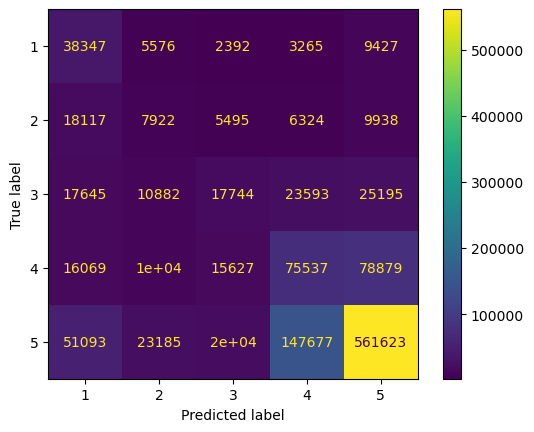

In [35]:
evaluation_criteria(y_test, y_pred_tfidf_text, cf1, X_test_tfidf_text)

Evaluation of RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, random_state=42):
Accuracy score is: 0.472372254179422
Classification report:
              precision    recall  f1-score   support

           1       0.40      0.52      0.45     59007
           2       0.07      0.47      0.11     47796
           3       0.35      0.14      0.20     95059
           4       0.28      0.27      0.28    196352
           5       0.81      0.56      0.66    803567

    accuracy                           0.47   1201781
   macro avg       0.38      0.39      0.34   1201781
weighted avg       0.64      0.47      0.53   1201781

Macro averaged ROC AUC: 0.7113168571609221
Confusion Matrix:


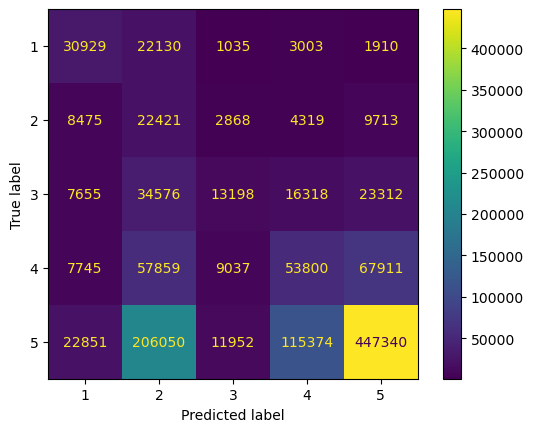

In [26]:
evaluation_criteria(y_test, y_pred, cf1, X_test_tfidf)

Evaluation of RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, random_state=42):
Accuracy score is: 0.4817841187371077
Classification report:
              precision    recall  f1-score   support

           1       0.35      0.56      0.44     59007
           2       0.07      0.42      0.12     47796
           3       0.31      0.15      0.20     95059
           4       0.28      0.28      0.28    196352
           5       0.81      0.57      0.67    803567

    accuracy                           0.48   1201781
   macro avg       0.36      0.40      0.34   1201781
weighted avg       0.63      0.48      0.53   1201781

Macro averaged ROC AUC: 0.7102311574383012
Confusion Matrix:


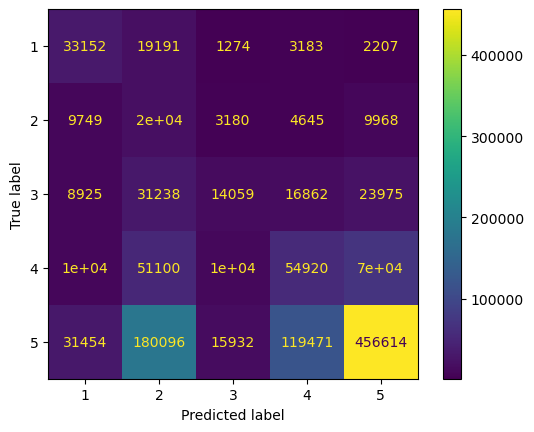

In [32]:
# Evaluation of random forest, bag of word, summary
evaluation_criteria(y_test, y_pred, cf1, X_test_bow_summary)

Accuracy score is: 0.6913256484149856
Classification report:
              precision    recall  f1-score   support

           1       0.42      0.58      0.49     14803
           2       0.12      0.11      0.11      9663
           3       0.28      0.16      0.21     18373
           4       0.32      0.10      0.15     40444
           5       0.78      0.90      0.83    194317

    accuracy                           0.69    277600
   macro avg       0.39      0.37      0.36    277600
weighted avg       0.64      0.69      0.65    277600

Confusion Matrix:


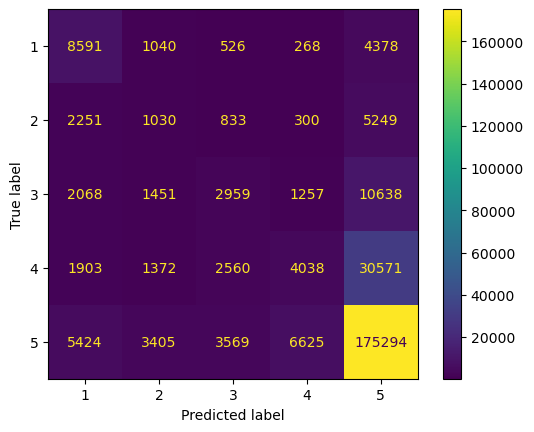

In [32]:

# Accuracy score
accuracy = accuracy_score(y_test_auto, y_pred2)
print(f"Accuracy score is: {accuracy}")
    
# Precision, recall and f1-score
print("Classification report:")
print(classification_report(y_test_auto, y_pred2))

cm = confusion_matrix(y_test_auto, y_pred2)
display_labels = [1, 2, 3, 4, 5]
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= display_labels)
print("Confusion Matrix:")
disp.plot(cmap="viridis")

In [ ]:
f1_score(y_pred,y_test,average = ‘weighted’)